<a href="https://colab.research.google.com/github/zile56/ElevvoPathways/blob/main/TrafficSignRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zilehasnain","key":"43c7071af35d729807be794c02829d02"}'}

In [ ]:
!mkdir -p ~/.kaggle            # Create the folder if it doesn't exist
!mv kaggle.json ~/.kaggle/     # Move the uploaded JSON into the folder
!chmod 600 ~/.kaggle/kaggle.json  # Set secure permissions


In [ ]:
!kaggle datasets list


ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000           9217        149  1.0              
rohitgrewal/airlines-flights-data                                Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          21467        393  1.0              
y0ussefkandil/bmw-sales2010-2024                                 BMW SALES(2010-2024)                                    853340  2025-08-09 12:59:09.653000           1739         27  0.88235295   

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 97% 593M/612M [00:11<00:00, 34.7MB/s]
100% 612M/612M [00:11<00:00, 57.9MB/s]


In [ ]:
!unzip gtsrb-german-traffic-sign.zip -d /content/GTSRB


Streaming output truncated to the last 5000 lines.
  inflating: /content/GTSRB/train/5/00005_00053_00010.png  
  inflating: /content/GTSRB/train/5/00005_00053_00011.png  
  inflating: /content/GTSRB/train/5/00005_00053_00012.png  
  inflating: /content/GTSRB/train/5/00005_00053_00013.png  
  inflating: /content/GTSRB/train/5/00005_00053_00014.png  
  inflating: /content/GTSRB/train/5/00005_00053_00015.png  
  inflating: /content/GTSRB/train/5/00005_00053_00016.png  
  inflating: /content/GTSRB/train/5/00005_00053_00017.png  
  inflating: /content/GTSRB/train/5/00005_00053_00018.png  
  inflating: /content/GTSRB/train/5/00005_00053_00019.png  
  inflating: /content/GTSRB/train/5/00005_00053_00020.png  
  inflating: /content/GTSRB/train/5/00005_00053_00021.png  
  inflating: /content/GTSRB/train/5/00005_00053_00022.png  
  inflating: /content/GTSRB/train/5/00005_00053_00023.png  
  inflating: /content/GTSRB/train/5/00005_00053_00024.png  
  inflating: /content/GTSRB/train/5/00005_00053_0

In [ ]:
IMG_SIZE = 28

def preprocess_image(img_path):
    img = cv2.imread(img_path)                  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert BGR → RGB
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))# resize
    img = img / 255.0                           # normalize pixels to [0,1]
    return img


In [ ]:
import os
print(os.listdir("/content/GTSRB/Train"))


['6', '9', '10', '4', '8', '34', '36', '1', '15', '33', '39', '38', '11', '40', '41', '19', '13', '30', '23', '29', '37', '20', '25', '28', '18', '17', '14', '24', '2', '42', '21', '27', '0', '35', '12', '16', '3', '32', '7', '22', '31', '5', '26']


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
NUM_CLASSES = 43
dataset_path = "/content/GTSRB/train"

X = []
y = []

for class_id in range(NUM_CLASSES):
    class_folder = os.path.join(dataset_path, str(class_id))
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        X.append(preprocess_image(img_path))
        y.append(class_id)

X = np.array(X)
y = to_categorical(y, NUM_CLASSES)  # one-hot labels


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


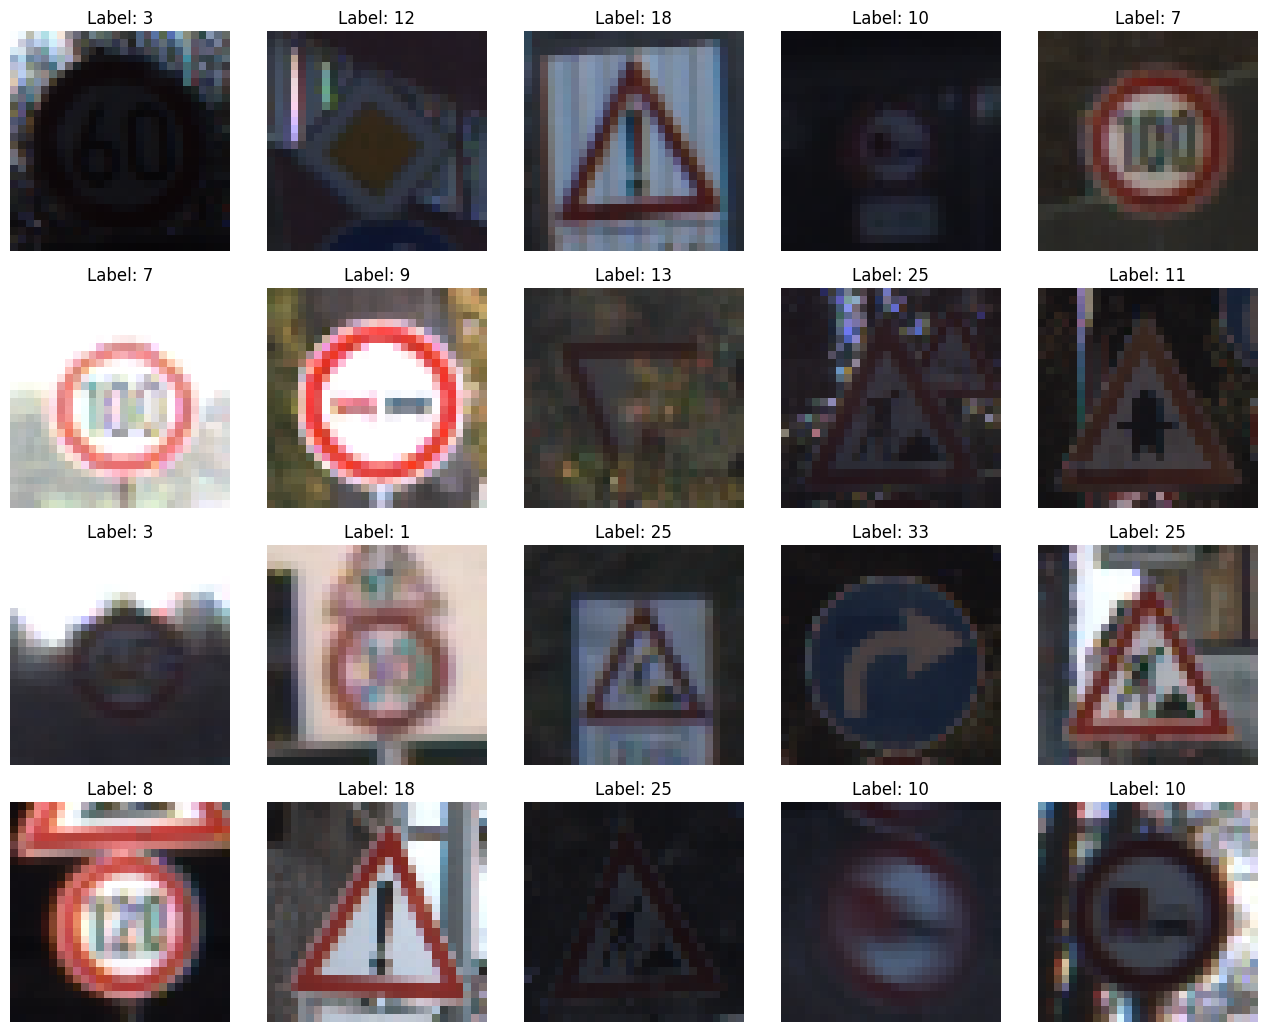

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.choice(len(X_train), 20, replace=False)

plt.figure(figsize=(13,13))

for i, idx in enumerate(indices):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx])
    plt.title(f"Label: {np.argmax(y_train[idx])}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
NUM_CLASSES = 43
IMG_SIZE = 28

model = Sequential([
    # First convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2,2)),

    # Second convolutional layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatten before fully connected layers
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,867 (897.92 KB)

 Trainable params: 229,867 (897.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=18,
                    batch_size=64)


Epoch 1/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.2399 - loss: 2.8823 - val_accuracy: 0.7789 - val_loss: 0.8530
Epoch 2/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.7075 - loss: 0.9565 - val_accuracy: 0.9320 - val_loss: 0.3235
Epoch 3/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.8287 - loss: 0.5524 - val_accuracy: 0.9553 - val_loss: 0.1874
Epoch 4/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8841 - loss: 0.3718 - val_accuracy: 0.9747 - val_loss: 0.1193
Epoch 5/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9026 - loss: 0.2994 - val_accuracy: 0.9791 - val_loss: 0.0907
Epoch 6/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9221 - loss: 0.2512 - val_accuracy: 0.9838 - val_loss: 0.0712
Epoch 7/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.9328 - loss: 0.2071 - val_accuracy: 0.9861 - val_loss: 0.0698
Epoch 8/18
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9390 - loss: 0.1930 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9910 - loss: 0.0464
Test Accuracy: 0.9909894466400146
